In [1]:
!pip install folium

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

Import Dataset

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\US_Accidents_Dec20_Updated.csv.zip")
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_18688\24921069.py:1: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\HP\\Downloads\\US_Accidents_Dec20_Updated.csv.zip")


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


Basic Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42768 entries, 0 to 42767
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     42768 non-null  object 
 1   Severity               42768 non-null  int64  
 2   Start_Time             42768 non-null  object 
 3   End_Time               42768 non-null  object 
 4   Start_Lat              42768 non-null  float64
 5   Start_Lng              42767 non-null  float64
 6   End_Lat                38562 non-null  float64
 7   End_Lng                38562 non-null  float64
 8   Distance(mi)           42767 non-null  float64
 9   Description            42767 non-null  object 
 10  Number                 14888 non-null  float64
 11  Street                 42767 non-null  object 
 12  Side                   42767 non-null  object 
 13  City                   42763 non-null  object 
 14  County                 42767 non-null  object 
 15  St

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,42768.000000,42768.000000,42767.000000,38562.000000,38562.000000,42767.000000,14888.000000,41785.000000,25171.000000,41728.000000,41928.000000,41718.000000,38250.000000,23564.000000
mean,2.289632,36.495281,-96.397656,36.474763,-96.128667,0.395864,6686.169130,61.049345,55.007914,65.188363,29.658250,9.133120,7.855014,0.010956
std,0.555169,4.997337,17.744411,4.995932,17.633613,1.608695,14504.608766,18.413176,22.212886,22.866381,0.907478,2.818903,5.267950,0.139378
min,1.000000,24.574811,-124.486270,24.571389,-124.486270,0.000000,1.000000,-23.800000,-41.600000,2.000000,20.270000,0.000000,0.000000,0.000000
25%,2.000000,33.631295,-117.810017,33.603940,-117.658536,0.000000,933.000000,49.000000,39.000000,49.000000,29.590000,10.000000,4.600000,0.000000
50%,2.000000,36.069109,-91.192314,36.019261,-91.060528,0.000000,3016.000000,63.000000,58.000000,68.000000,29.920000,10.000000,7.000000,0.000000
75%,3.000000,40.316956,-80.843825,40.268014,-80.824167,0.288000,7990.250000,75.000000,72.000000,84.000000,30.070000,10.000000,10.400000,0.000000
max,4.000000,48.997581,-68.365955,48.997581,-68.365405,148.360001,851799.000000,117.000000,110.000000,100.000000,31.120000,80.000000,232.000000,9.990000


In [6]:
df.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    1
End_Lat                   4206
End_Lng                   4206
Distance(mi)                 1
Description                  1
Number                   27880
Street                       1
Side                         1
City                         5
County                       1
State                        1
Zipcode                     14
Country                      1
Timezone                    46
Airport_Code                93
Weather_Timestamp          682
Temperature(F)             983
Wind_Chill(F)            17597
Humidity(%)               1040
Pressure(in)               840
Visibility(mi)            1050
Wind_Direction             925
Wind_Speed(mph)           4518
Precipitation(in)        19204
Weather_Condition         1057
Amenity                      1
Bump                         1
Crossing

Extract Time Features

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

Time of Day Patterns

C:\Users\HP\AppData\Local\Temp\ipykernel_18688\984989193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


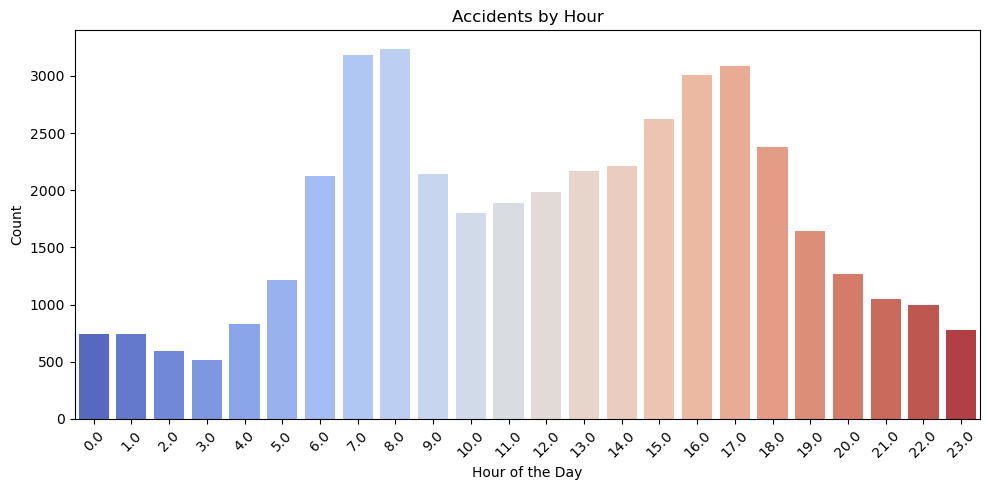

In [8]:
# Accidents by hour
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Weather Condition Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_18688\611384163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.values, y=top_weather.index, palette='viridis')


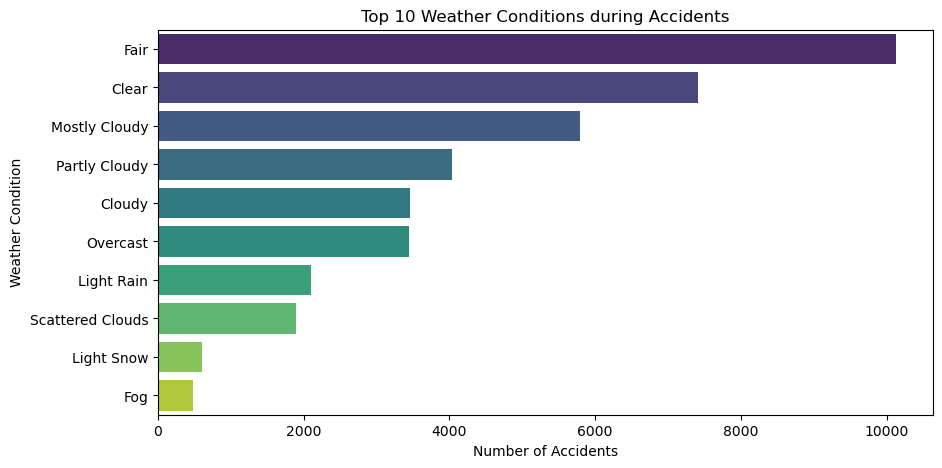

In [9]:
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index, palette='viridis')
plt.title('Top 10 Weather Conditions during Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

Road Surface Condition (if available)

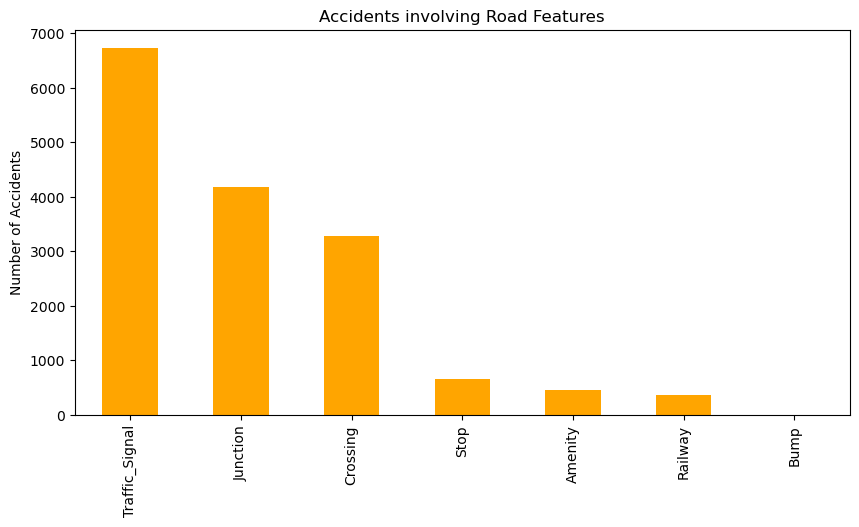

In [10]:
road_features = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Railway', 'Traffic_Signal', 'Stop']

df[road_features].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Accidents involving Road Features")
plt.ylabel("Number of Accidents")
plt.show()

Accidents by Day of Week

C:\Users\HP\AppData\Local\Temp\ipykernel_18688\3846689197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')


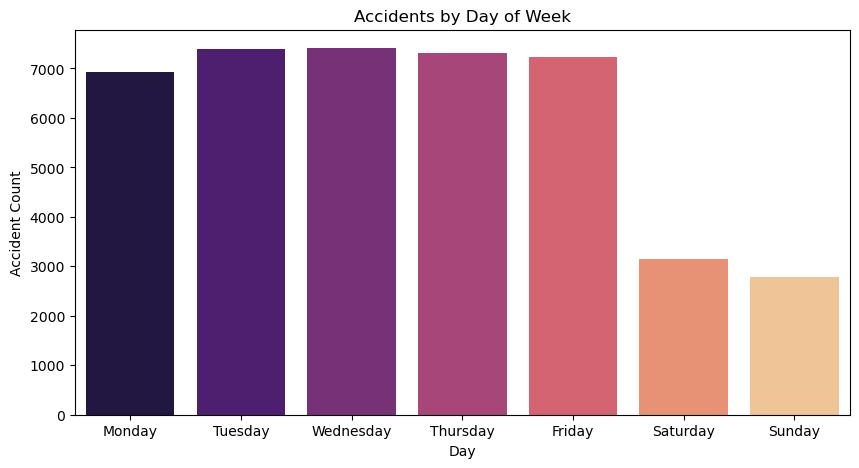

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Accident Count')
plt.show()

Accident Hotspots Map (Using HeatMap)

In [12]:
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000)  # sample for performance

m = folium.Map(location=[39.50, -98.35], zoom_start=5)  # Center of US
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']], radius=8).add_to(m)

m.save("accident_hotspots_map.html")

Correlation of Severity with Conditions

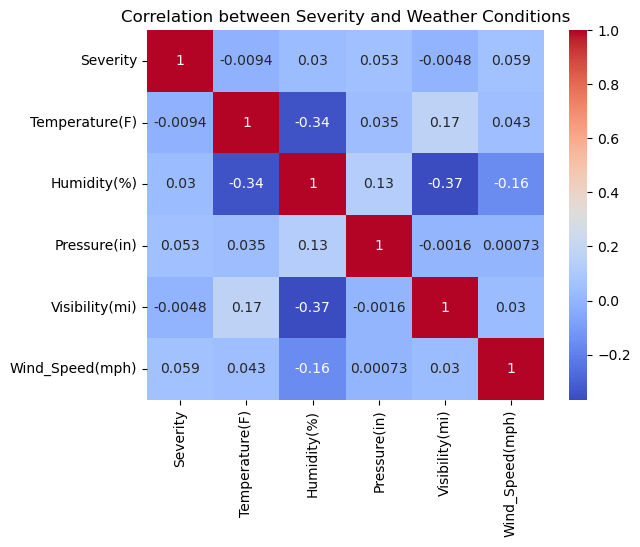

In [13]:
factors = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
sns.heatmap(df[factors].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Severity and Weather Conditions')
plt.show()

Summary Insights

In [14]:
print("Most accidents occur during:", df['Hour'].mode()[0], "hrs")
print("Day with most accidents:", df['Day'].mode()[0])
print("Most common weather condition:", df['Weather_Condition'].mode()[0])
print("Most accident-prone month:", df['Month'].mode()[0])

Most accidents occur during: 8.0 hrs
Day with most accidents: Wednesday
Most common weather condition: Fair
Most accident-prone month: December


In [16]:
m.save("accident_hotspots_map.html")

In [1]:
import os
os.getcwd()

'C:\\Users\\HP'